<div style=”text-align: left”> Bachelorarbeit, Lattice Boltzmann Simulation

<img src="pic/ost_logo.jpg" width="300" align="right"/>
<br> FS 2021 
<br>  <a href=mailto:remo.haenggi@hotmail.ch> Student: Remo Hänggi </a> <a href=mailto:christoph.wuersch@ost.ch>
<br>
Advisor: Prof. Dr. Christoph Würsch </a </div>
    
---

# Lattice Boltzmann Simulation mit Flügelprofil

Dieses Notebook behandelt das Strömungsverhalten um ein Flügelprofil in einem geschlossenen Kanal. Dazu verwenden wir das [`lbmpy`](https://pycodegen.pages.i10git.cs.fau.de/lbmpy/) Paket des [Walberla Frameworks](https://www.walberla.net) und eine Python Datei `Channel_Flow`, welche ein paar zusätzliche Funktionen bietet.

## Inhaltsverzeichnis:

* [Einleitung](#Einleitung)
    * [Initialisierung](#Initialisierung) 
    * [Flügelprofil erstellen](#Flügelprofil_erstellen)


* [Flügelprofilanalyse mit xfoil](#Flügelprofilanalyse_mit_xfoil)
    * [Übersicht](#Übersicht) 
    * [Lift Koeffizient](#Lift_Koeffizient)
    * [Drag Koeffizient](#Drag_Koeffizient)
    * [Drag/Druck Koeffizient](#Drag/Druck_Koeffizient)
    * [Moment Koeffizient](#Moment_Koeffizient)
    * [Top und Bottom Xtr](#Top_und_Bottom_Xtr)
    * [Lift/Drag Gegenüberstellung](#Lift/Drag_Gegenüberstellung)


* [Flügelprofilanalyse mit lbmpy](#Flügelprofilanalyse_mit_lbmpy)
    * [Dichteverteilung am Flügelprofil](#Dichteverteilung_am_Flügelprofil) 
    * [Kraftvektor am Flügelprofil](#Kraftvektor_am_Flügelprofil)
    * [Lift und Drag Kräfte](#Lift_und_Drag_Kräfte)


* [Animation](#Animation)

---

## Einleitung <a class="anchor" id="Einleitung"></a>

Dieses Kapitel gibt eine kurze Einleitung für die Verwendung der Funktionen von `Channel_Flow`. Wie die Funktionen von `lbmpy` verwendet werden, wurde im vorgängigem Notebook behandelt und wird hier nicht mehr näher erläutert.

Für einen ersten Versuch wählen wir eher kleine Grössen aus. Kleine Werte sind stabiler und schneller rechenbar.

### Initialisierung <a class="anchor" id="Initialisierung"></a>

Die Initialisierung der Hauptklasse von `Channel_Flow` übernimmt die Erstellung einer Simulationsumgebung von `lbmpy`. Die Parameter, welche für die Initialisierung übergeben werden, bestimmen diese Simulationsumgebung. Die Parameter werden als physikalische Grössen übergeben und dann in Lattice Grössen umgewandelt.

| Eingabewerte            | Einheiten            |
| :------------------     | :------------------: |
| Methode                 | srt, cumulant        |
| Optimierung Target      | cpu, gpu             |
| Länge des Kanals        | $m$                  |
| Höhe des Kanals         | $m$                  |
| Länge für eine Zelle    | $m$                  |
| Länge des Flügelprofils | $m$                  |
| Geschwindigkeit         | $\Large\frac{m}{s}$  |
| Kinematische Viskosität | $\Large\frac{m^2}{s}$| 

Nach dem initialisieren kann die Simulationsumgebung bestätigt oder verworfen werden. Dies dient zur Kontrolle der Lattice Grössen. Die Grösse des Kanals in Lattice Zellen hat zum Beispiel einen beträchtlichen Einfluss auf die Rechenzeit. Zusätzlich muss auch beachtet werden, dass die Relaxation Zeit nicht zu nahe an 2 heran kommt. Die Lattice Geschwindigkeit wurde für die Umrechnung von physikalisch zu lattice auf den Wert 0.1 fixiert.

In [1]:
import Channel_Flow as cf

In [2]:
'''Alle pysikalischen Werte für die Initialisierung definieren'''

# Methode definieren
method = "srt"

# Optimierung bestimmen
target = "gpu"

# Länge und Höhe des Kanals in Meter
channel_length = 0.01
channel_height = 0.005

# Länge einer Zelle in Meter
# Bestimmt die Auflösung der Simulation
length_per_cell = 0.00001

# Länge des Flügelprofils
length_airfoil = 0.0025

# Maximale Geschwindigkeit definieren in Meter pro Sekunde
velocity = 5.56

# Kinematische Viskosität definieren in Quadratmeter pro Sekunde
viscosity = 1.516e-5

In [3]:
channel_flow = cf.Channel_Flow(method=method,
                               target=target,
                               length=channel_length, 
                               height=channel_height, 
                               length_per_cell=length_per_cell, 
                               length_airfoil=length_airfoil, 
                               velocity=velocity, 
                               viscosity=viscosity)

Pysikalische Grössen: 
 
 
 
 Bezeichnung 
 Wert 
 Einheit 
 
 
 
 
 0 
 Länge Kanal: 
 0.01 
 m 
 
 
 1 
 Höhe Kanal: 
 0.005 
 m 
 
 
 2 
 Distanz pro Zelle: 
 0.00001 
 m 
 
 
 3 
 Geschwindigkeit: 
 5.560 
 m/s 
 
 
 4 
 Viskosität: 
 0.000015 
 m^2/s 
 
 
 5 
 Reynolds Zahl: 
 916.887 
 
 
 
 Lattice Grössen: 
 
 
 
 Bezeichnung 
 Wert 
 
 
 
 
 0 
 Länge Kanal: 
 1000 
 
 
 1 
 Höhe Kanal: 
 500 
 
 
 2 
 Geschwindigkeit: 
 0.100 
 
 
 3 
 Relaxationszeit: 
 1.718808

Sind die Parameter zufriedenstellend? [ [y] / n ]
Erstelle Szenario...


C:\Users\studadm\anaconda3\lib\site-packages\pystencils\gpucuda\cudajit.py:73: UserWarning: The CUDA compiler succeeded, but said the following:
nvcc warning : The -std=c++11 flag is not supported with the configured host compiler. Flag will be ignored.
kernel.cu

  mod = SourceModule(code, options=nvcc_options, include_dirs=[


Szenario wurde erfolgreich erstellt.


Der erste Schritt ist geschafft. Mit der `channel_flow` Variable haben wir nun eine Simulationsumgebung geschaffen, welche wir weiter modifizieren können.

### Flügelprofil erstellen <a class="anchor" id="Flügelprofil_erstellen"></a>

Wenn wir die Simulation im jetzigen Zustand ausführen würden, wäre das Resultat ein leerer Kanal mit einem poiseuille flow. Diesen Schritt überspringen wir und gehen direkt zur Flügelprofilerstellung mit der `set_obstacle` Funktion über.

| Eingabewerte            | Einheiten            |
| :------------------     | :------------------: |
| NACA4 Nummer            | vierstellige Zahl    |
| Angriffswinkel          | $Grad$               |
| Horizontale Position    | $\Large\frac{1}{x}$  |

Für die horizontale Position übergeben wir nur die Zahl $x$. Eine zwei würde der Mitte des Kanals entsprechen. Eine Zahl zwischen drei und vier führt meistens zu einer guten Platzierung.

Nach dem Aufrufen der `set_obstacle` Funktion wird unsere Simulationsumgebung mit dem gewünschten Flügelprofil angezeigt. Um fortzufahren wird wieder eine Bestätigung erwartet, da ein gesetztes Hindernis in unserer Umgebung nicht ohne weiteres entfernt werden kann.

In [4]:
'''Alle Werte für das Flügelprofil definieren'''

# NACA4 Nummer als String
NACA4_Number = "0012"

# Angriffswinkel bestimmen
angle = 0

# Horizontale Position als Nenner
loc_horizontal = 3

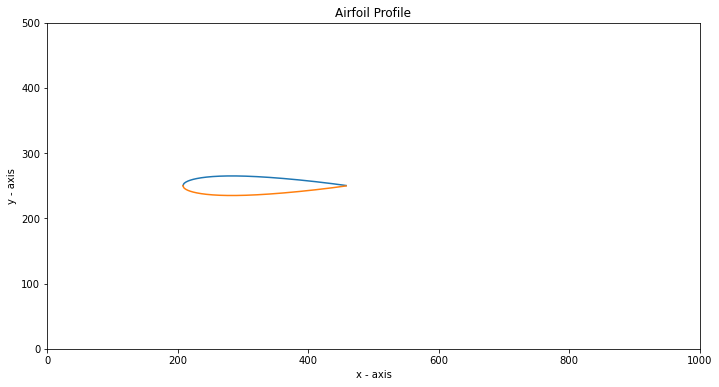

Soll dieses Profil in das Scenario eingebaut werden? [ [y] / n ]
Profil wird als Hindernis eingebaut...
Profil wurde erfolgreich eingebaut.


In [5]:
channel_flow.set_obstacle(NACA4_Number=NACA4_Number,
                          angle=angle,
                          loc_horizontal=loc_horizontal)

Wenn aus versehen ein falsches Profil bestätigt wurde, ist die Initialisierung einer neuen Simulationsumgebung der einfachste Weg dies rückgängig zu machen. Nach diesen Schritten sind wir einsatzbereit und können die Simulation ein paar Iterationen laufen lassen.

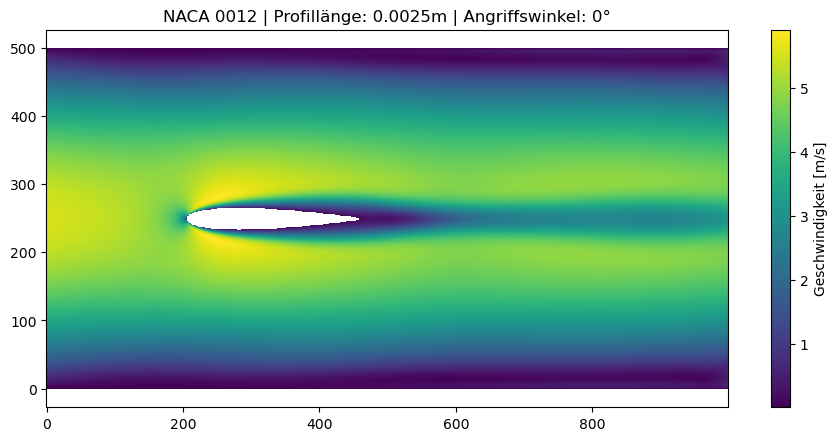

In [6]:
channel_flow.scenario.run(100000)
channel_flow.plot_velocity()

---

## Flügelprofilanalyse mit xfoil <a class="anchor" id="Flügelprofilanalyse_mit_xfoil"></a>

[`xfoil`](https://web.mit.edu/drela/Public/web/xfoil/) wurde in den 1980er Jahren programmiert und bis 2013 weiter entwickelt. Das Alter macht sich durch das Userinterface bemerkbar. Das Programm wird in einer Konsolenumgebung ausgeführt und mit CMD ähnlichen Befehlen benutzt. Trotz des Alters wird `xfoil` immer noch für die Berechnung von Flügelprofilen verwendet. Wir verwenden es, um ein paar Richtwerte für unser Profil zu berechnen.


### Übersicht <a class="anchor" id="Übersicht"></a>

Zuerst werden wir einmal betrachten, was uns `xfoil` für Informationen liefern kann. Dazu können wir die `xfoil` Klasse in `Channel_Flow` initialisieren und dabei ein paar Parameter übergeben.

| Eingabewerte            | Einheiten            |
| :------------------     | :------------------: |
| NACA4 Nummer            | vierstellige Zahl    |
| Angriffswinkel Anfang   | $Grad$               |
| Angriffswinkel Ende     | $Grad$               |
| Angriffswinkel Schritt  | $Grad$               |
| Reynoldszahl            |                      |
| Maximale Iterationen    |                      |

Die `xfoil` Klasse in `Channel_Flow` wird mit diesen Parameter eine Datei mit Befehlen erstellen, welches dann von `xfoil` eingelesen und ausgeführt wird.

Die Berechnung wird von einem Startwinkel bis zu einem Endwinkel in einer vorgegebenen Schrittgrösse durchgeführt. Die Reynoldszahl bestimmt dabei die Simulationsumgebung. Damit wir die berechneten Werte mit unserer Simulation gleich stellen können, müssen wir also die passende Reynoldszahl eingeben. Die Reynoldszahl wird durch die folgende Gleichung berechnet:

$Re = \Large\frac{u\cdot{L}}{\nu}$

$u:$ Flussgeschwindigkeit des Mediums<br>
$L:$ Länge unseres Flügelprofils<br>
$\nu:$ Kinematische Viskosität des Mediums

Die Berechnung eines Profils mit `xfoil` verwendet für die charakteristische Länge $L$ einen Standard von einem Meter. Das bedeutet, dass wir die Reynoldszahl unserer Simulation ein bisschen modifizieren müssen. 

In [7]:
import Channel_Flow as cf

In [8]:
'''Alle Werte für eine xfoil Analyse definieren'''

# NACA Definition als String (Format: "NACAxxxx")
airfoil = "NACA0012"

# Anfangswinkel definieren
alpha_i = 0

# Endwinkel definieren
alpha_f = 15

# Winkelschrittgrösse definieren
alpha_step = 0.5

# Reynoldszahl mit Modifizierung
# Länge des Profils und Reynoldszahl kann aus 
# der Initialisierung einer Simulationsumgebung genommen werden
length_airfoil = 0.0025
Re = 916.887 / length_airfoil

# Maximale Anzahl Iterationen, in der xfoil eine Lösung finden kann
n_iter = 300

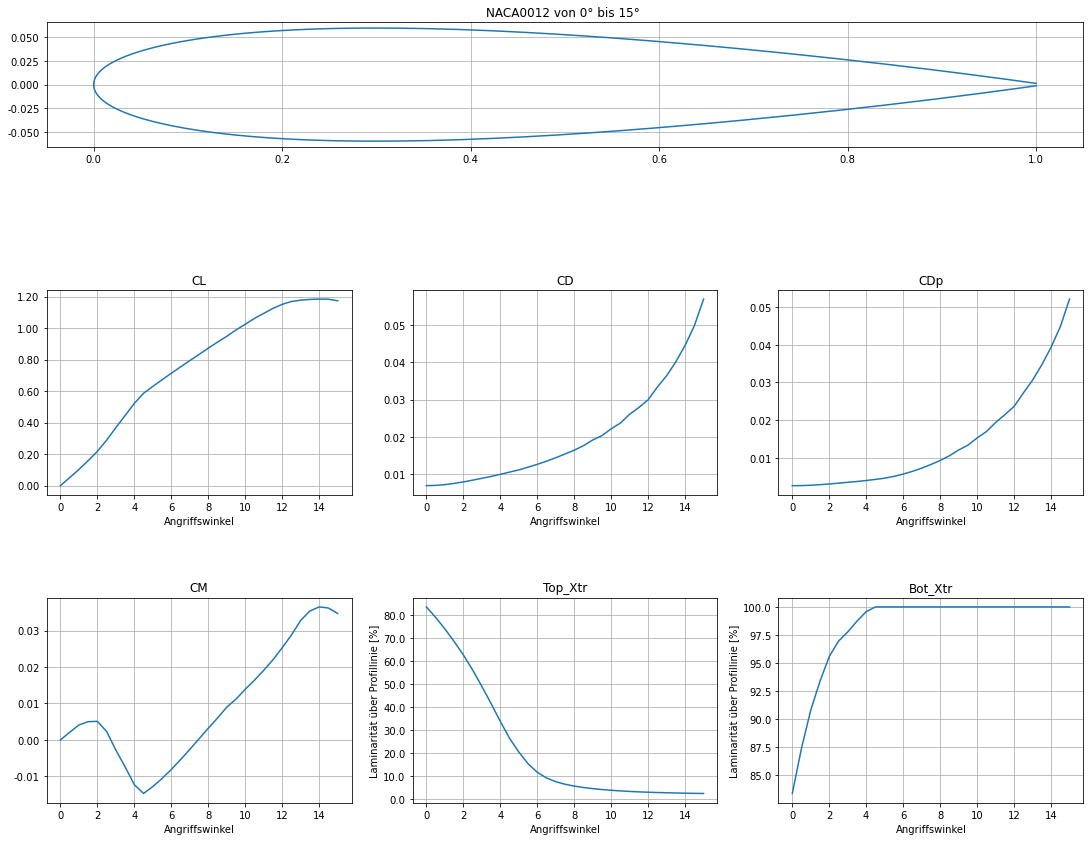

In [9]:
naca0012 = cf.xfoil(airfoil=airfoil, 
                    alpha_i=alpha_i, 
                    alpha_f=alpha_f, 
                    alpha_step=alpha_step, 
                    Re=Re, 
                    n_iter=n_iter)

naca0012.plot_polar_data()

Diese Ansammlung von Plots zeigt uns, welche Werte wir mit einer `xfoil` Analyse bekommen können.

    - CL: Lift Koeffizient
    - CD: Drag Koeffizient
    - CDp: Drag/Druck Koeffizient
    - CM: Moment Koeffizient
    - Top_Xtr: Laminar/Turbulent Wechsel für obere Seite des Profils
    - Bot_Xtr: Laminar/Turbulent Wechsel für untere Seite des Profils
    
Auf der Seite von [aerotoolbox](https://aerotoolbox.com/lift-drag-moment-coefficient/) werden die Koeffizienten detailierter erklärt.
    
### Lift Koeffizient <a class="anchor" id="Lift_Koeffizient"></a>

Der Lift Koeffizient $C_L$ sagt uns etwas über die entstehende Lift Kraft aus. Ein grösserer Koeffizient bedeutet eine grössere Lift Kraft. Anhand des $C_L$ Plots können wir darum sagen, dass die grösste Lift Kraft bei einem Angriffswinkel von ungefähr 13° bis 14° sein muss.

$C_L = \Large\frac{2\cdot{F_L}}{\rho \cdot v^2 \cdot A}$

$F_L:$ Lift Kraft<br>
$\rho:$ Dichte des Mediums<br>
$v:$ [Wahre Windgeschwindigkeit](https://support.garmin.com/de-AT/?faq=lQFTLBSlv73TYGsOpDB7P6)<br>
$A:$ Projizierte Flügelfläche


### Drag Koeffizient <a class="anchor" id="Drag_Koeffizient"></a>

Der Drag Koeffizient $C_D$ sagt uns etwas über die grösse der Drag Kraft. Die Drag Kraft kann als Widerstandskraft verstanden werden. Je grösser die Kraft, umso stärker wird das Flugzeug in Richtung des Windes gedrückt. Der Plot zeigt uns einen exponentiellartigen Anstieg dieser Kraft. Das kann logisch nachvollzogen werden. Wenn wir uns das Flügelprofil in einem 90° Winkel vorstellen, wird diese Kraft wahrscheinlich am grössten sein.

$C_D = \Large\frac{2\cdot{F_D}}{\rho \cdot v^2 \cdot A}$

$F_D:$ Drag Kraft<br>
$\rho:$ Dichte des Mediums<br>
$v:$ Wahre Windgeschwindigkeit<br>
$A:$ Projizierte Flügelfläche


### Drag/Druck Koeffizient <a class="anchor" id="Drag/Druck_Koeffizient"></a>

Der Drag/Druck Koeffizient bringt zusätzlich zur Drag Berechnung eine Druckverteilung über die Flügelfläche ins Spiel. Für dieses Notebook werden wir aber mit dem Drag Koeffizienten arbeiten.


### Moment Koeffizient <a class="anchor" id="Moment_Koeffizient"></a>

Der Moment Koeffizient $C_M$ gibt uns Informationen über die wirkenden Drehmoment Kräfte am Flügelprofil. Dieses Drehmoment würde je nach grösse eine Änderung im Angriffswinkel mit sich ziehen, wenn nicht gegengelenkt würde. Dieser Koeffizient sagt also auch etwas über die Stabilität des Profils aus.

$C_M = \Large\frac{2\cdot{M}}{\rho \cdot v^2 \cdot A \cdot c}$

$M:$ Drehmoment<br>
$\rho:$ Dichte des Mediums<br>
$v:$ Wahre Windgeschwindigkeit<br>
$A:$ Projizierte Flügelfläche<br>
$c:$ Flügelprofil Länge


### Top und Bottom Xtr <a class="anchor" id="Top_und_Bottom_Xtr"></a>

Die Werte der Top und Bottom Xtr Plots geben uns eine Vorstellung des Strömungsbild direkt am Flügelprofil. Die Werte werden in oberes Profil (top) und unteres Profil (bot) aufgeteilt. Liegt der Prozentwert bei einem Angriffswinkel bei 100%, wird die komplette Länge der Profillinie laminar umströmt. Ein von 90% würde also bedeuten, dass die Strömung für 10% der Profillinienlänge turbulent wurde. Diese Werte können uns sehr schön aufzeigen, ob ein Strömungsabriss am Profil entsteht oder nicht.

### Lift/Drag Gegenüberstellung <a class="anchor" id="Lift/Drag_Gegenüberstellung"></a>

Eine beliebte Variante der Koeffizientendarstellung ist das gegenüberstellen des Lift und Drag Koeffizienten.

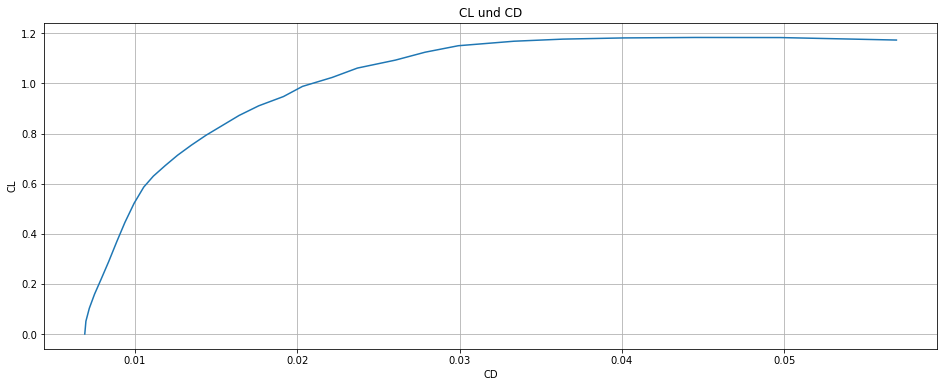

In [10]:
naca0012.plot_CL_to_CD()

Diese Darstellungsart kann uns zu einem bevorzugten Punkt verhelfen, an dem $\Large\frac{F_L}{F_D}$ den maximalen Wert erreichen kann. Dieser Punkt liefert uns für unser Simulationsszenario den effizientesten Angriffswinkel. Um diesen Punkt zu finden, müssen wir vom Nullpunkt eine tangentiale Gerade zeichnen. Der anliegende Punkt gibt uns den maximal Wert.

<img src="pic/CD_CL_Tangente.png" width="900" align="left"/>

Wenn wir den dazugehörigen Angriffswinkel im Lift oder Drag Koeffizient Plot herauslesen, können wir den effizientesten Angriffswinkel ungefähr auf 4.1° festlegen.

--- 


## Flügelprofilanalyse mit lbmpy <a class="anchor" id="Flügelprofilanalyse_mit_lbmpy"></a>

Im vorherigen Kapitel haben wir ein paar grössen in der Flügelprofilanalyse kennen gelernt. In diesem Kapitel schauen wir uns an, was wir alles aus einer Simulationsumgebung herausholen können.

### Dichteverteilung am Flügelprofil <a class="anchor" id="Dichteverteilung_am_Flügelprofil"></a>

Die Form eines Flügelprofils ist der Schlüssel zum Auftrieb. Durch unterschiedliche Windgeschwindigkeiten an der Ober- und Unterseite eines Profils entsteht ein Druckunterschied. Dieser Unterschied liefert uns dann eine Kraft, die entweder nach Oben oder nach unten wirkt. Um dieses Phänomen zu visualisieren, können wir die Dichte an der Unter- und Oberseite des Profils mit der Funktion `plot_density()` im `Channel_Flow` Programm darstellen. 

<img src="pic/Fluegelprofil.png" width="500" align="center"/>

Dafür erstellen wir zuerst ein Szenario und lassen es ein paar Schritte laufen, damit wir eine stabile Ausgangslage haben.

In [11]:
import Channel_Flow as cf

In [12]:
'''Alle pysikalischen Werte für die Initialisierung definieren'''

# Methode definieren
method = "srt"

# Optimierung bestimmen
target = "gpu"

# Länge und Höhe des Kanals in Meter
channel_length = 0.01
channel_height = 0.005

# Länge einer Zelle in Meter
# Bestimmt die Auflösung der Simulation
length_per_cell = 0.00001

# Länge des Flügelprofils
length_airfoil = 0.0025

# Maximale Geschwindigkeit definieren in Meter pro Sekunde
velocity = 5.56

# Kinematische Viskosität definieren in Quadratmeter pro Sekunde
viscosity = 1.516e-5

# Szenario erstellen
channel_flow = cf.Channel_Flow(method=method,
                               target=target,
                               length=channel_length, 
                               height=channel_height, 
                               length_per_cell=length_per_cell, 
                               length_airfoil=length_airfoil, 
                               velocity=velocity, 
                               viscosity=viscosity)

Pysikalische Grössen: 
 
 
 
 Bezeichnung 
 Wert 
 Einheit 
 
 
 
 
 0 
 Länge Kanal: 
 0.01 
 m 
 
 
 1 
 Höhe Kanal: 
 0.005 
 m 
 
 
 2 
 Distanz pro Zelle: 
 0.00001 
 m 
 
 
 3 
 Geschwindigkeit: 
 5.560 
 m/s 
 
 
 4 
 Viskosität: 
 0.000015 
 m^2/s 
 
 
 5 
 Reynolds Zahl: 
 916.887 
 
 
 
 Lattice Grössen: 
 
 
 
 Bezeichnung 
 Wert 
 
 
 
 
 0 
 Länge Kanal: 
 1000 
 
 
 1 
 Höhe Kanal: 
 500 
 
 
 2 
 Geschwindigkeit: 
 0.100 
 
 
 3 
 Relaxationszeit: 
 1.718808

Sind die Parameter zufriedenstellend? [ [y] / n ]
Erstelle Szenario...


C:\Users\studadm\anaconda3\lib\site-packages\pystencils\gpucuda\cudajit.py:73: UserWarning: The CUDA compiler succeeded, but said the following:
nvcc warning : The -std=c++11 flag is not supported with the configured host compiler. Flag will be ignored.
kernel.cu

  mod = SourceModule(code, options=nvcc_options, include_dirs=[


Szenario wurde erfolgreich erstellt.


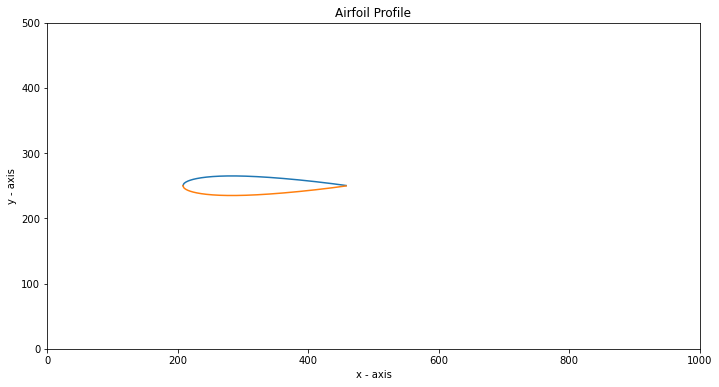

Soll dieses Profil in das Scenario eingebaut werden? [ [y] / n ]
Profil wird als Hindernis eingebaut...
Profil wurde erfolgreich eingebaut.


In [13]:
'''Alle Werte für das Flügelprofil definieren'''

# NACA4 Nummer als String
NACA4_Number = "0012"

# Angriffswinkel bestimmen
angle = 0

# Horizontale Position als Nenner
loc_horizontal = 3

# Flügelprofil einbauen
channel_flow.set_obstacle(NACA4_Number=NACA4_Number,
                          angle=angle,
                          loc_horizontal=loc_horizontal)

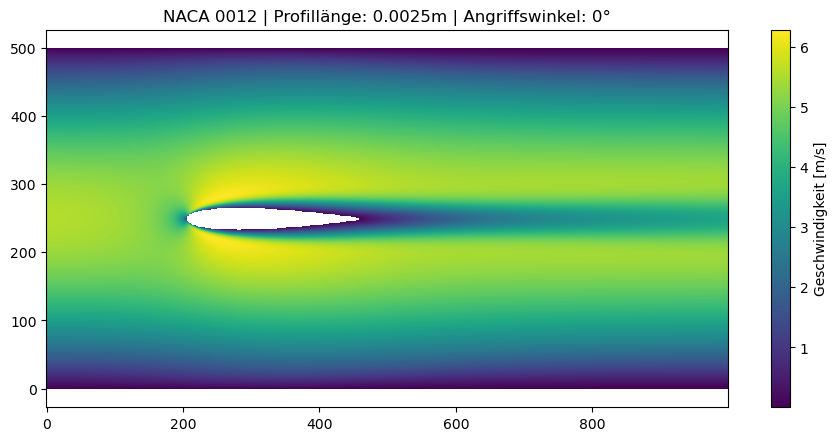

In [14]:
channel_flow.scenario.run(500000)
channel_flow.plot_velocity()

In diesem Zustand können wir nun die Dichteverteilung begutachten.

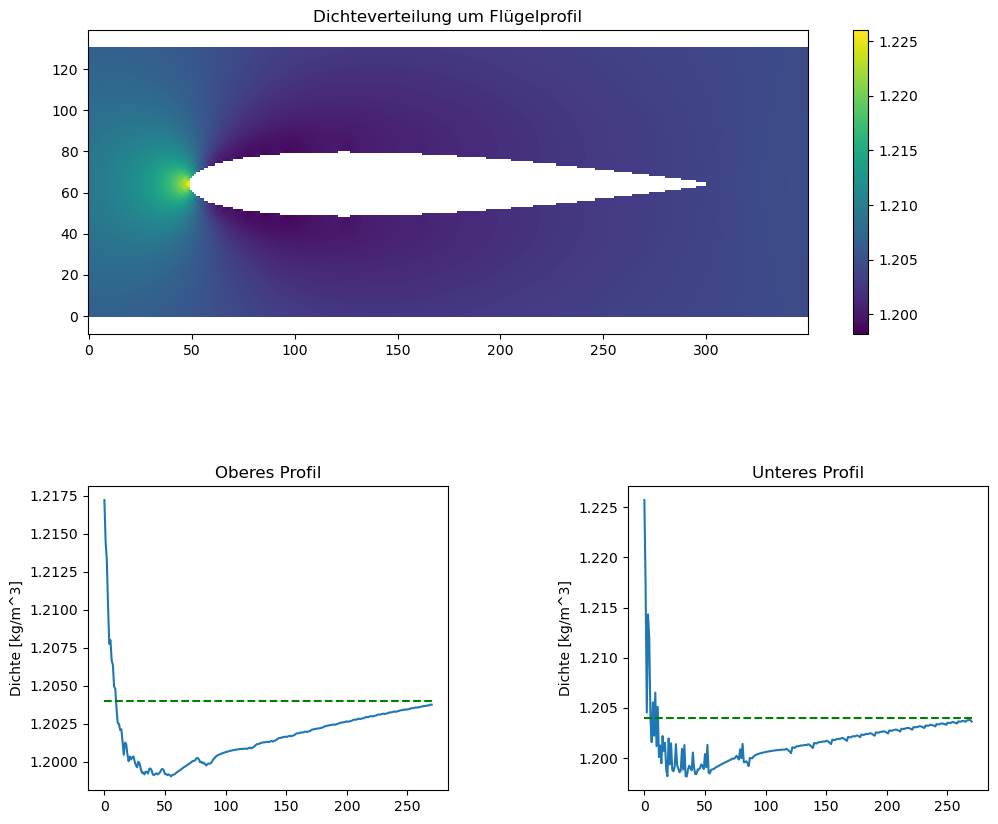

In [15]:
channel_flow.plot_density(figsize=(10, 4))

Die grüne Linie zeigt uns die initialisierte Dichte des Simulationsraumes. Liegt der Wert darunter, herrscht ein Unterdruck an dieser Stelle. Umgekehrt herrscht ein Überdruck. Für dieses symmetrische Flügelprofil bei einem Angriffswinkel von null Grad sehen wir, dass das obere und untere Profil ungefähr die gleiche Dichteverteilung besitzen. Um die Angabe ein wenig interessanter zu gestalten, werden wir mit der `update_obstacle_angle()` Funktion den Angriffswinkel ändern und die Simulation ein paar Schritte laufen lassen. Danach können wir erneut die Dichteverteilung ausgeben.

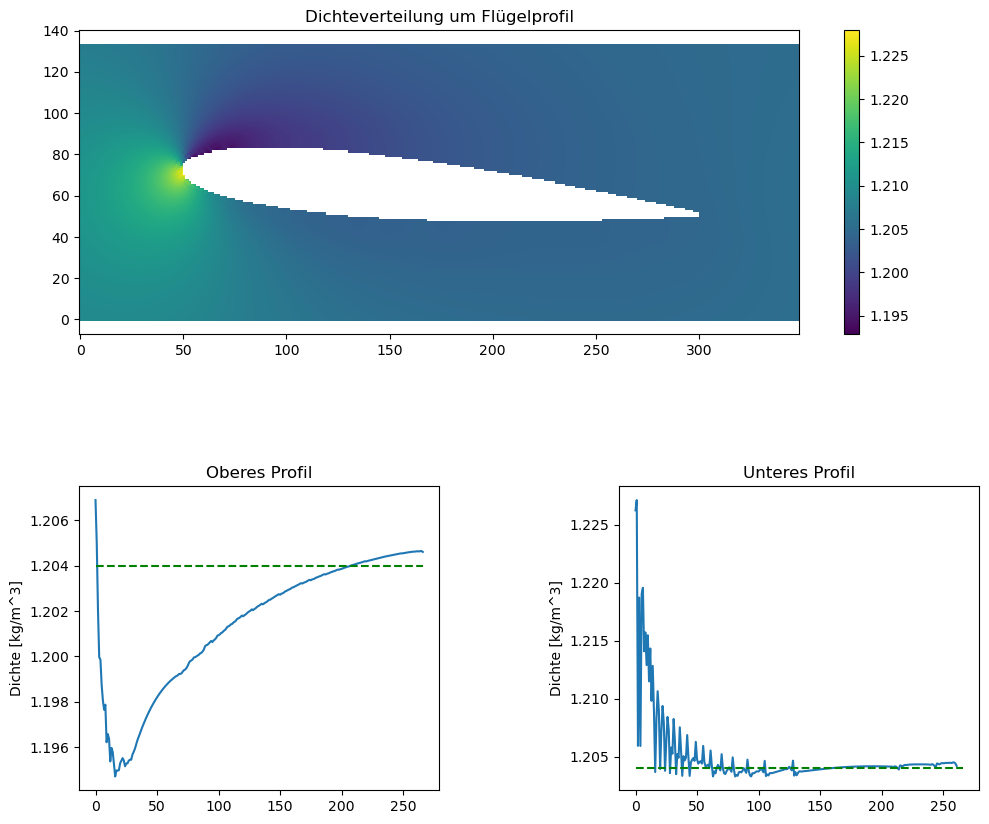

In [16]:
channel_flow.update_obstacle_angle(angle_inc=5)
channel_flow.scenario.run(50000)
channel_flow.plot_density(figsize=(10, 4))

Bei einem Angriffswinkel von fünf Grad sehen wir eine deutliche Veränderung. Über die gesammte Länge des oberen Profils liegt ein deutlicher Unterdruck an. 


### Kraftvektor am Flügelprofil  <a class="anchor" id="Kraftvektor_am_Flügelprofil"></a>

Um eine Vorstellung der Richtung zu bekommen, in welcher die entstehenden Kräfte zeigen, können wir die `plot_velocity_with_force()` verwenden. Das Resultat ist ein Geschwindigkeitsplot mit einem Richtungsvektor. Der Vektor ist zusammengesetzt aus der Drag und Lift Kraft. Dieser Plot gibt uns eine schöne visuelle Vorstellung davon, in welche Richtung das Flügelprofil gezogen wird.

<img src="pic/Kraftvektor.png" width="700" align="center"/>

Wir werden diese Funktion im nächsten Abschnitt einbauen.

### Lift und Drag Kräfte  <a class="anchor" id="Lift_und_Drag_Kräfte"></a>

Zum Abschluss der Flügelprofil Analyse können wir die Kräfte über verschiedene Angriffswinkel herauslesen und diese in einem Diagramm darstellen.

In [17]:
import Channel_Flow as cf

In [18]:
'''Alle pysikalischen Werte für die Initialisierung definieren'''

# Methode definieren
method = "srt"

# Optimierung bestimmen
target = "gpu"

# Länge und Höhe des Kanals in Meter
channel_length = 0.01
channel_height = 0.005

# Länge einer Zelle in Meter
# Bestimmt die Auflösung der Simulation
length_per_cell = 0.00001

# Länge des Flügelprofils
length_airfoil = 0.0025

# Maximale Geschwindigkeit definieren in Meter pro Sekunde
velocity = 5.56

# Kinematische Viskosität definieren in Quadratmeter pro Sekunde
viscosity = 1.516e-5

# Szenario erstellen
channel_flow = cf.Channel_Flow(method=method,
                               target=target,
                               length=channel_length, 
                               height=channel_height, 
                               length_per_cell=length_per_cell, 
                               length_airfoil=length_airfoil, 
                               velocity=velocity, 
                               viscosity=viscosity)

Pysikalische Grössen: 
 
 
 
 Bezeichnung 
 Wert 
 Einheit 
 
 
 
 
 0 
 Länge Kanal: 
 0.01 
 m 
 
 
 1 
 Höhe Kanal: 
 0.005 
 m 
 
 
 2 
 Distanz pro Zelle: 
 0.00001 
 m 
 
 
 3 
 Geschwindigkeit: 
 5.560 
 m/s 
 
 
 4 
 Viskosität: 
 0.000015 
 m^2/s 
 
 
 5 
 Reynolds Zahl: 
 916.887 
 
 
 
 Lattice Grössen: 
 
 
 
 Bezeichnung 
 Wert 
 
 
 
 
 0 
 Länge Kanal: 
 1000 
 
 
 1 
 Höhe Kanal: 
 500 
 
 
 2 
 Geschwindigkeit: 
 0.100 
 
 
 3 
 Relaxationszeit: 
 1.718808

Sind die Parameter zufriedenstellend? [ [y] / n ]
Erstelle Szenario...
Szenario wurde erfolgreich erstellt.


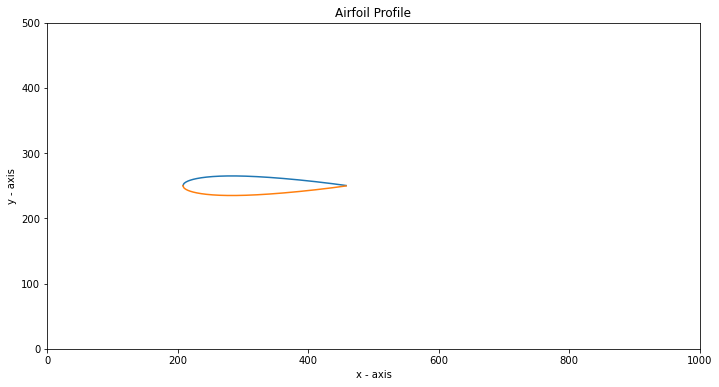

Soll dieses Profil in das Scenario eingebaut werden? [ [y] / n ]
Profil wird als Hindernis eingebaut...
Profil wurde erfolgreich eingebaut.


In [19]:
'''Alle Werte für das Flügelprofil definieren'''

# NACA4 Nummer als String
NACA4_Number = "0012"

# Angriffswinkel bestimmen
angle = 0

# Horizontale Position als Nenner
loc_horizontal = 3

# Flügelprofil einbauen
channel_flow.set_obstacle(NACA4_Number=NACA4_Number,
                          angle=angle,
                          loc_horizontal=loc_horizontal)

Nach dem erstellen eines Szenarios können wir die Parameter für die Kraftanalyse bestimmen. Dabei muss beachtet werden, dass der maximale Winkel `max_angle` auf den momentanen Angriffswinkel des Szenarios dazu gerechnet wird. Wird das Szenario also mit einem Angriffswinkel von fünf Grad initialisiert und der maximale Winkel auf fünf Grad gesetzt, werden die Kräfte für die Angriffswinkel zwischen fünf und zehn Grad berechnet.

Eine kurze Erklärung des Analysevorgangs hilft, die Parameter bessere zu verstehen. Der Angriffswinkel des Flügelprofils wird bei jedem Iterationsschritt `iter` um $\Large\frac{max angle}{iter}$ geändert. Die Simulation ist in diesem Stadium jedoch noch nicht wieder eingeschwungen. Um ein sauberes Resultat zu erhalten, muss nach diesem Winkelupdate die Simulation für ein paar Schritte `steps` laufen. Danach werden die Kräfte gespeichert und der nächste Iterationsschritt kann beginnen. 

Um zu gewährleisten, dass der Winkel am Ende auf einer sauberen Zahl landet, sollte die Anzahl Iterationen `iter` als ein vielfaches vom maximalen Winkel gewählt werden.

In [20]:
'''Parameter für Kraftanalyse bestimmen'''

# Maximaler Winkel (Das Flügelprofil wird um so viel Grad gedreht)
max_angle = 15

# Anzahl Zwischenschritte für stabile Messung
steps = 50000

# Anzahl Iterationen (bestimmt die Auflösung des Graphen)
# der Wert sollte ein vielfaches des Maximalen Winkels sein
iter = 30

C:\Users\studadm\Desktop\BA_Abgabe\LBM_Notebook_Series\01_Flügelprofil_Analyse\Channel_Flow.py:349: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes()


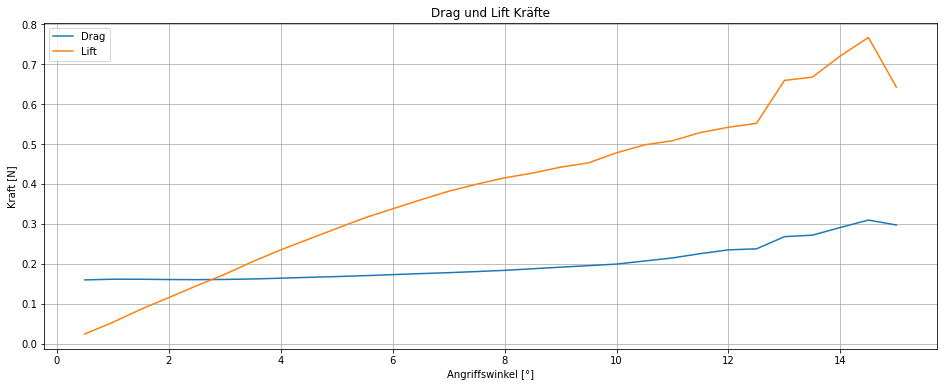

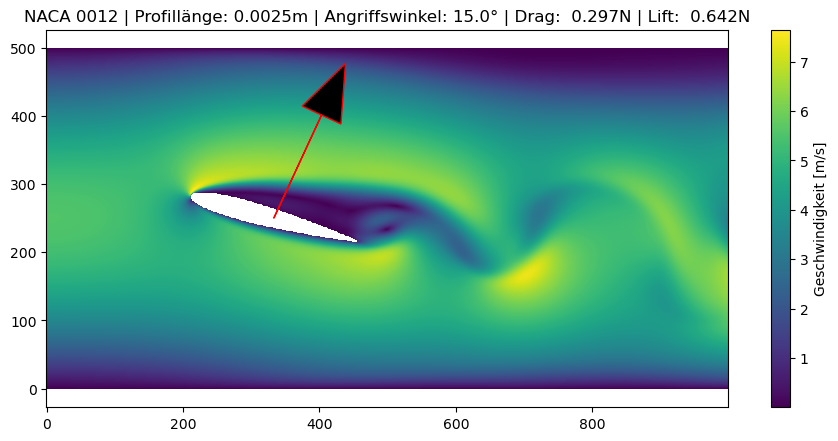

In [21]:
# Initialisierungsschritte
channel_flow.scenario.run(500000)

# Kräfteanalyse über verschiedene Angriffswinkel
channel_flow.plot_forces_with_angle_change(max_angle=max_angle, steps=steps, iter=iter)

# Geschwindigkeitsplot für das Ende (mit Kraftvektor)
channel_flow.plot_velocity_with_force()

# Zurücksetzen des Winkels und Ausführung von ein paar stabilisierungs Schritten
channel_flow.update_obstacle_angle(angle_inc=-max_angle)
channel_flow.scenario.run(steps)

Für eine andere Darstellungsart können wir auch die Kräfte gegeneinander darstellen. 

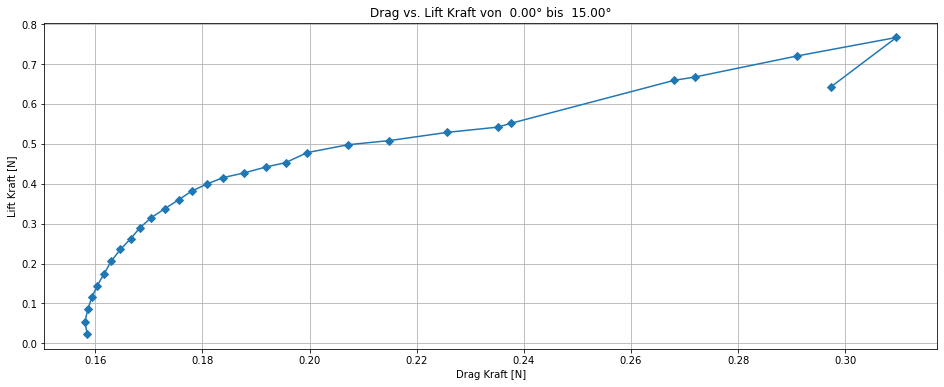

In [22]:
# Kräfteanalyse mit Drag und Lift Kräfte gegeneinander geplottet
channel_flow.plot_forces_against_eachother(max_angle=max_angle, steps=steps, iter=iter)

# Zurücksetzen des Winkels und Ausführung von ein paar stabilisierungs Schritten
channel_flow.update_obstacle_angle(angle_inc=-max_angle)
channel_flow.scenario.run(steps)

---

## Animation <a class="anchor" id="Animation"></a>

Für den letzten Teil dieses Notebooks sehen wir uns kurz die Erstellung von Animationen an. 

In [23]:
import Channel_Flow as cf

In [24]:
'''Alle pysikalischen Werte für die Initialisierung definieren'''

# Methode definieren
method = "srt"

# Optimierung bestimmen
target = "gpu"

# Länge und Höhe des Kanals in Meter
channel_length = 0.01
channel_height = 0.005

# Länge einer Zelle in Meter
# Bestimmt die Auflösung der Simulation
length_per_cell = 0.00002

# Länge des Flügelprofils
length_airfoil = 0.0025

# Maximale Geschwindigkeit definieren in Meter pro Sekunde
velocity = 5.56

# Kinematische Viskosität definieren in Quadratmeter pro Sekunde
viscosity = 1.516e-5

# Szenario erstellen
channel_flow = cf.Channel_Flow(method=method,
                               target=target,
                               length=channel_length, 
                               height=channel_height, 
                               length_per_cell=length_per_cell, 
                               length_airfoil=length_airfoil, 
                               velocity=velocity, 
                               viscosity=viscosity)

Pysikalische Grössen: 
 
 
 
 Bezeichnung 
 Wert 
 Einheit 
 
 
 
 
 0 
 Länge Kanal: 
 0.01 
 m 
 
 
 1 
 Höhe Kanal: 
 0.005 
 m 
 
 
 2 
 Distanz pro Zelle: 
 0.00002 
 m 
 
 
 3 
 Geschwindigkeit: 
 5.560 
 m/s 
 
 
 4 
 Viskosität: 
 0.000015 
 m^2/s 
 
 
 5 
 Reynolds Zahl: 
 916.887 
 
 
 
 Lattice Grössen: 
 
 
 
 Bezeichnung 
 Wert 
 
 
 
 
 0 
 Länge Kanal: 
 500 
 
 
 1 
 Höhe Kanal: 
 250 
 
 
 2 
 Geschwindigkeit: 
 0.100 
 
 
 3 
 Relaxationszeit: 
 1.848773

Sind die Parameter zufriedenstellend? [ [y] / n ]
Erstelle Szenario...


C:\Users\studadm\anaconda3\lib\site-packages\pystencils\gpucuda\cudajit.py:73: UserWarning: The CUDA compiler succeeded, but said the following:
nvcc warning : The -std=c++11 flag is not supported with the configured host compiler. Flag will be ignored.
kernel.cu

  mod = SourceModule(code, options=nvcc_options, include_dirs=[


Szenario wurde erfolgreich erstellt.


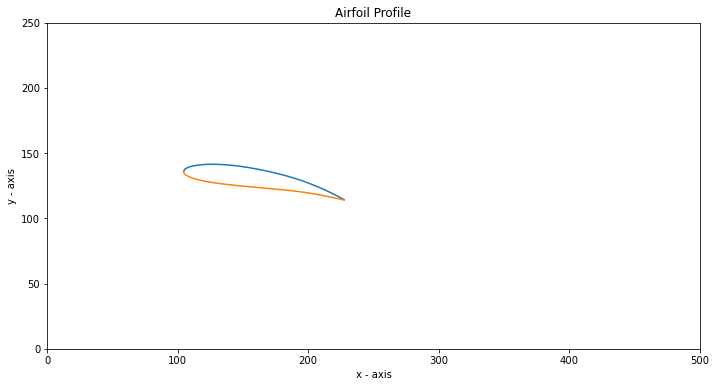

Soll dieses Profil in das Scenario eingebaut werden? [ [y] / n ]
Profil wird als Hindernis eingebaut...
Profil wurde erfolgreich eingebaut.


In [25]:
'''Alle Werte für das Flügelprofil definieren'''

# NACA4 Nummer als String
NACA4_Number = "6412"

# Angriffswinkel bestimmen
angle = 10

# Horizontale Position als Nenner
loc_horizontal = 3

# Flügelprofil einbauen
channel_flow.set_obstacle(NACA4_Number=NACA4_Number,
                          angle=angle,
                          loc_horizontal=loc_horizontal)

Wir können die Animation entweder mit einem stationären Flügelprofil erstellen oder wir können den Angriffswinkel im laufe der Animation anpassen. Der erste Block zeigt auf, wie eine stationäre Animation erstellt werden kann. Dazu benötigen wir nur die Anzahl Frames und eine Animationsloop Funktion, welche die Geschwindigkeitsarrays des Szenarios nach ein paar Schritten zurückgibt.

In [26]:
%matplotlib inline
from IPython.display import HTML
from lbmpy.session import *

# Initialisierungsschritte
channel_flow.scenario.run(100000)

# Anzahl Frames definieren (300 Frames entstprechen etwa einem 9 Sekunden Video)
frames = 300

# Animationsloop
def run_anim():
    channel_flow.scenario.run(100)
    return channel_flow.scenario.velocity[:,:]

# Erstellung der Animation
animation = plt.vector_field_magnitude_animation(run_anim, frames=frames, rescale=True)
plt.title("Channel Flow NACA 6412 | Angriffswinkel: 10° | Geschwindigkeit: 5.56 m/s | Reynolds Nummer: 916")
plt.close()

HTML(animation.to_html5_video())

Im nächsten Block haben wir die Möglichkeit für eine Winkeländerung eingebaut. Dazu verwenden wir die `update_obstacle_angle()` Funktion in der Animationsloop Funktion. 

In [27]:
%matplotlib inline
from IPython.display import HTML
from lbmpy.session import *

# Initialisierungsschritte
channel_flow.scenario.run(100000)

# Anzahl Frames definieren
frames = 300

# Winkeländerung definieren
max_angle = 10
angle_inc = max_angle / frames

# Animationsloop
def run_anim():
    channel_flow.update_obstacle_angle(angle_inc=angle_inc)
    channel_flow.scenario.run(100)
    return channel_flow.scenario.velocity[:,:]

# Erstellung der Animation
animation = plt.vector_field_magnitude_animation(run_anim, frames=frames, rescale=True)
plt.title("Channel Flow NACA 6412 | Angriffswinkel: 10° - 20° | Geschwindigkeit: 5.56 m/s | Reynolds Nummer: 916")
plt.close()

HTML(animation.to_html5_video())

Diese Animationen können interessante Strömungsbilder aufzeigen. Um ein gespühr dafür zu bekommen, kannst du mit den Parametern herum experimentieren und mit rechtsklick auf das Video deine Entdeckungen abspeichern.

Somit sind wir am Ende des zweiten Notebooks angelangt. Viel Spass beim experimentieren.

---

<div style=”text-align: left”> Bachelorarbeit, Lattice Boltzmann Simulation

<img src="pic/ost_logo.jpg" width="350" align="right"/>
<br> FS 2021 <br>  <a href=mailto:remo.haenggi@hotmail.ch> Student: Remo Hänggi </a> <a href=mailto:christoph.wuersch@ost.ch>
<br>
Advisor: Prof. Dr. Christoph Würsch </a </div>